<a href="https://colab.research.google.com/github/sagunala/Python_Practice/blob/main/Spotify_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplolib inline

UsageError: Line magic function `%matplolib` not found.


In [41]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

In [42]:
!pip install graphviz 
import graphviz
import pydotplus
import io
from scipy import misc

In [4]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import pandas as pd 
data=pd.read_csv('gdrive/My Drive/data_Spotify.csv')

In [6]:
data.head(5)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [7]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [9]:
train, test = train_test_split(data, test_size=0.15)
print("Training Size: {}, Test Size: {}".format(len(train),len(test)))

Training Size: 1714, Test Size: 303


In [10]:
red_blue = ['#19B5FE','#EF4836']
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")

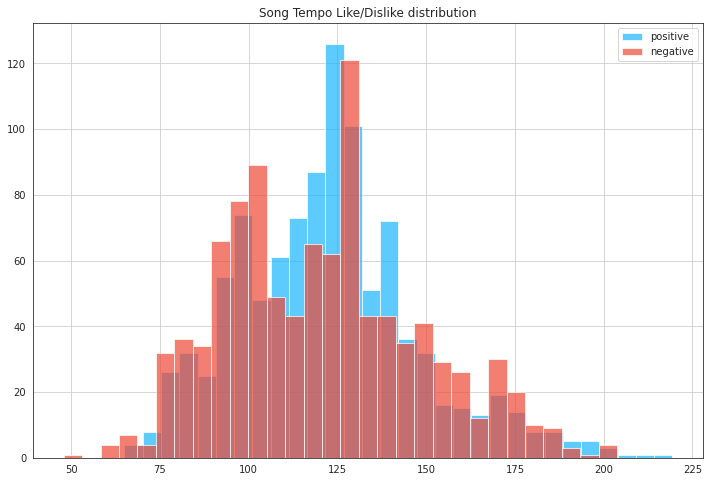

In [11]:
pos_tempo = data[data['target']==1]['tempo']
neg_tempo = data[data['target']==0]['tempo']

fig = plt.figure(figsize=(12,8))
plt.title("Song Tempo Like/Dislike distribution")
pos_tempo.hist(alpha=0.7, bins=30, label='positive')
neg_tempo.hist(alpha=0.7, bins=30, label='negative')
plt.legend(loc = 'upper right')

In [12]:
data.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Song Instrumentalness Like/Dislike Distribution')

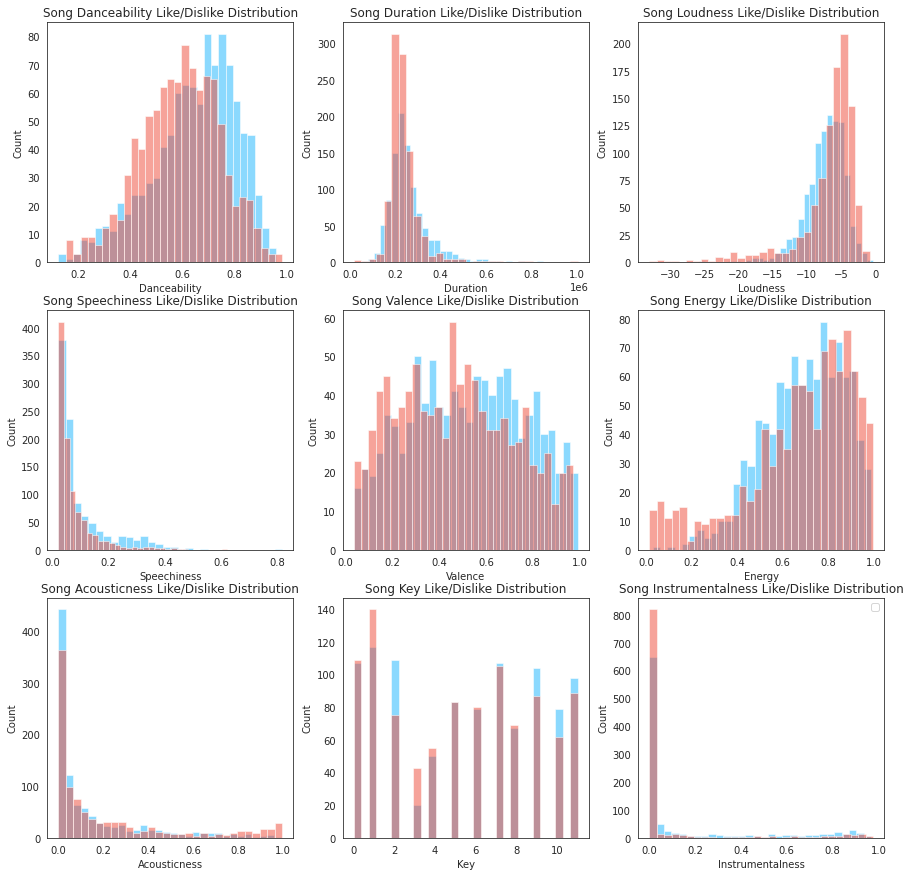

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
pos_dance = data[data['target']==1]['danceability']
neg_dance = data[data['target']==0]['danceability']

#Danceability
axs[0, 0].hist(pos_dance, alpha=0.5, bins=30)
axs[0, 0].hist(neg_dance, alpha=0.5, bins=30)
axs[0, 0].set_xlabel('Danceability')
axs[0, 0].set_ylabel('Count')
axs[0, 0].set_title('Song Danceability Like/Dislike Distribution')
plt.legend(loc = 'upper right')

#Duration

pos_duration = data[data['target']==1]['duration_ms']
neg_duration = data[data['target']==0]['duration_ms']

axs[0, 1].hist(pos_duration, alpha=0.5, bins=30)
axs[0, 1].hist(neg_duration, alpha=0.5, bins=30)
axs[0, 1].set_xlabel('Duration')
axs[0, 1].set_ylabel('Count')
axs[0, 1].set_title('Song Duration Like/Dislike Distribution')

#Loudness

pos_loudness = data[data['target']==1]['loudness']
neg_loudness = data[data['target']==0]['loudness']

axs[0, 2].hist(pos_loudness, alpha=0.5, bins=30)
axs[0, 2].hist(neg_loudness, alpha=0.5, bins=30)
axs[0, 2].set_xlabel('Loudness')
axs[0, 2].set_ylabel('Count')
axs[0, 2].set_title('Song Loudness Like/Dislike Distribution')

#Speechiness
pos_speechiness = data[data['target']==1]['speechiness']
neg_speechiness = data[data['target']==0]['speechiness']

axs[1, 0].hist(pos_speechiness, alpha=0.5, bins=30)
axs[1, 0].hist(neg_speechiness, alpha=0.5, bins=30)
axs[1, 0].set_xlabel('Speechiness')
axs[1, 0].set_ylabel('Count')
axs[1, 0].set_title('Song Speechiness Like/Dislike Distribution')

#Valence
pos_valence = data[data['target']==1]['valence']
neg_valence = data[data['target']==0]['valence']

axs[1, 1].hist(pos_valence, alpha=0.5, bins=30)
axs[1, 1].hist(neg_valence, alpha=0.5, bins=30)
axs[1, 1].set_xlabel('Valence')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_title('Song Valence Like/Dislike Distribution')

#Energy
pos_energy = data[data['target']==1]['energy']
neg_energy = data[data['target']==0]['energy']

axs[1, 2].hist(pos_energy, alpha=0.5, bins=30)
axs[1, 2].hist(neg_energy, alpha=0.5, bins=30)
axs[1, 2].set_xlabel('Energy')
axs[1, 2].set_ylabel('Count')
axs[1, 2].set_title('Song Energy Like/Dislike Distribution')

#Acousticness
pos_acousticness = data[data['target']==1]['acousticness']
neg_acousticness = data[data['target']==0]['acousticness']

axs[2, 0].hist(pos_acousticness, alpha=0.5, bins=30)
axs[2, 0].hist(neg_acousticness, alpha=0.5, bins=30)
axs[2, 0].set_xlabel('Acousticness')
axs[2, 0].set_ylabel('Count')
axs[2, 0].set_title('Song Acousticness Like/Dislike Distribution')

#Key
pos_key = data[data['target']==1]['key']
neg_key = data[data['target']==0]['key']

axs[2, 1].hist(pos_key, alpha=0.5, bins=30)
axs[2, 1].hist(neg_key, alpha=0.5, bins=30)
axs[2, 1].set_xlabel('Key')
axs[2, 1].set_ylabel('Count')
axs[2, 1].set_title('Song Key Like/Dislike Distribution')

#Instrumentalness
pos_instrumentalness = data[data['target']==1]['instrumentalness']
neg_instrumentalness = data[data['target']==0]['instrumentalness']

axs[2, 2].hist(pos_instrumentalness, alpha=0.5, bins=30)
axs[2, 2].hist(neg_instrumentalness, alpha=0.5, bins=30)
axs[2, 2].set_xlabel('Instrumentalness')
axs[2, 2].set_ylabel('Count')
axs[2, 2].set_title('Song Instrumentalness Like/Dislike Distribution')

In [15]:
model = DecisionTreeClassifier(min_samples_split=100)

In [24]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness', 'key', 'liveness', 'loudness', 'mode','speechiness', 'tempo', 'time_signature', 'valence']

In [25]:
X_train=train[features]
y_train = train['target']

In [26]:
X_test=test[features]
y_test = test['target']

In [47]:
dt = model.fit(X_train,y_train)
import cv2

In [48]:
def show_tree(tree, features, path):
  f = io.StringIO()
  export_graphviz(tree, out_file=f, feature_names = features)
  pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
  img=cv2.imread(path)
  plt.rcParams['figure.figsize']= (20,20)
  plt.imshow(img)

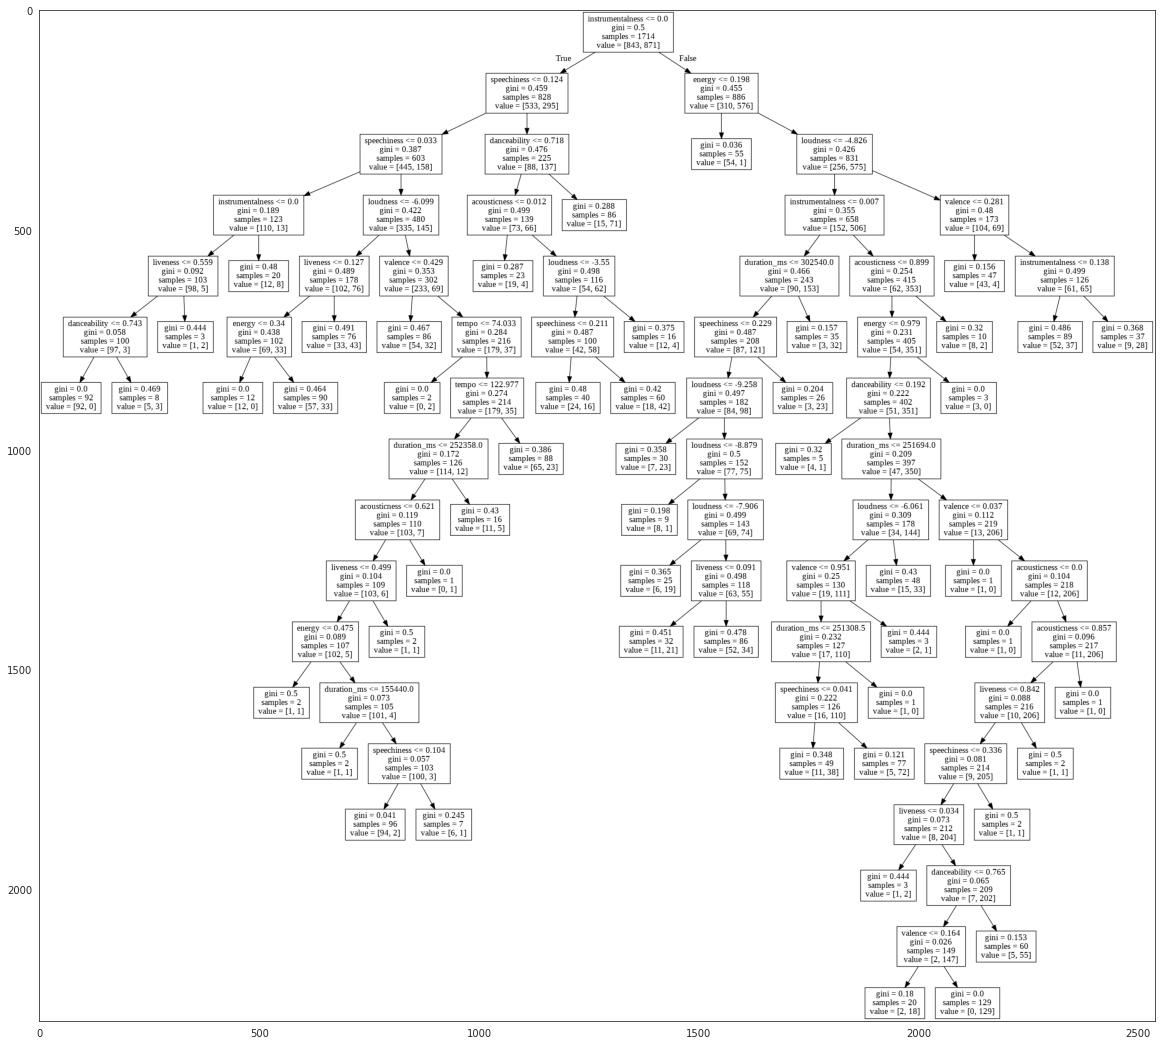

In [49]:
show_tree(dt, features, 'dec_tree_01.png')

In [50]:
y_pred = model.predict(X_test)

In [51]:
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [56]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred) *100

In [59]:
print("Accuracy of Decision tree",round(score,1), "%")

Accuracy of Decision tree 69.0 %
